<a href="https://colab.research.google.com/github/ViktoryLoktionova/dl_nlp_imdb_embedding/blob/main/dl_nlp_imdb_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

In [62]:
max_words = 10000

In [63]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [ ]:
x_train[3]

In [33]:
y_train[3]

1

In [64]:
maxlen = 200

In [65]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding = 'post')
x_train = pad_sequences(x_test, maxlen=maxlen, padding = 'post')

In [66]:
x_train[3]

array([   1,   13, 1228,  119,   14,  552,    7,   20,  190,   14,   58,
         13,  258,  546, 1786,    8, 1968,    4,  268,  237,   13,  191,
         81,   15,   13,   80,   43, 3824,   44,   12,   14,   16,  427,
       3192,    4,  183,   15,  593,   19,    4,  351,  362,   26,   55,
        646,   21,    4, 1239,   84,   26, 1557, 3755,   13,  244,    6,
       2071,  132,  184,  194,    5,   13,   70, 4478,  546,   73,  190,
         13,   62,   24,   81,  320,    4,  538,    4,  117,  250,  127,
         11,   14,   20,   82,    4,  452,   11,   14,   20,    9, 8654,
         19,   41,  476,    8,    4,  213,    7, 9185,   13,  657,   13,
        286,   38, 1612,   44,   41,    5,   41, 1729,   88,   13,   62,
         28,  900,  510,    4,  509,   51,    6,  612,   59,   16,  193,
         61, 4666,    5,  702,  930,  143,  285,   25,   67,   41,   81,
        366,    4,  130,   82,    9,  259,  334,  397, 1195,    7,  149,
        102,   15,   26,  814,   38,  465, 1627,   

In [67]:
y_train[3]

1

In [68]:
model = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [69]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [70]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 2s 8ms/step - loss: 0.6934 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 2/15
176/176 [==============================] - 1s 7ms/step - loss: 0.6890 - accuracy: 0.5690 - val_loss: 0.6934 - val_accuracy: 0.5072
Epoch 3/15
176/176 [==============================] - 1s 7ms/step - loss: 0.6827 - accuracy: 0.6049 - val_loss: 0.6946 - val_accuracy: 0.4916
Epoch 4/15
176/176 [==============================] - 1s 7ms/step - loss: 0.6717 - accuracy: 0.6362 - val_loss: 0.6964 - val_accuracy: 0.4924
Epoch 5/15
176/176 [==============================] - 1s 7ms/step - loss: 0.6570 - accuracy: 0.6564 - val_loss: 0.7000 - val_accuracy: 0.4888
Epoch 6/15
176/176 [==============================] - 1s 7ms/step - loss: 0.6396 - accuracy: 0.6772 - val_loss: 0.7045 - val_accuracy: 0.4944
Epoch 7/15
176/176 [==============================] - 1s 7ms/step - loss: 0.6189 - accuracy: 0.6974 - val_loss: 0.7112 - val_accuracy: 0.4984
Epoch 

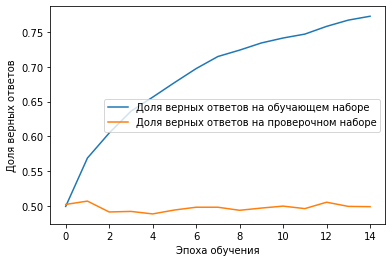

In [71]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [74]:
embedding_matrix = model.layers[0].get_weights()[0]

In [75]:
embedding_matrix[:5]

array([[-0.0042813 ,  0.00276577],
       [-0.00988778, -0.07209501],
       [-0.00879982, -0.00693782],
       [ 0.01753977, -0.00203763],
       [-0.00875492,  0.01621618]], dtype=float32)

In [76]:
word_index_org = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [77]:
word_index = dict()
for word,number in word_index_org.items():
    word_index[word] = number + 3
word_index["<Заполнитель>"] = 0
word_index["<Начало последовательности>"] = 1
word_index["<Неизвестное слово>"] = 2  
word_index["<Не используется>"] = 3

In [78]:
word = 'good'
word_number = word_index[word]
print('Номер слова', word_number)
print('Вектор для слова', embedding_matrix[word_number])

Номер слова 52
Вектор для слова [0.08966786 0.05310123]


In [79]:
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

In [80]:
filename = 'imdb_embeddings.csv'

In [81]:
with open(filename, 'w') as f:
    for word_num in range(max_words):
      word = reverse_word_index[word_num]
      vec = embedding_matrix[word_num]
      f.write(word + ",")
      f.write(','.join([str(x) for x in vec]) + "\n")

In [82]:
!head -n 20 $filename

<Заполнитель>,-0.004281305,0.0027657715
<Начало последовательности>,-0.009887782,-0.072095014
<Неизвестное слово>,-0.008799824,-0.0069378214
<Не используется>,0.017539773,-0.0020376332
the,-0.008754916,0.016216181
and,0.007287048,0.0027808154
a,0.006714573,-0.027805932
of,0.023803996,-0.05402893
to,-0.014136215,-0.019359844
is,-0.018748462,0.013000021
br,-0.0017711783,-0.022456247
in,0.05427109,-0.014634923
it,0.0060710865,-0.002601751
i,0.011071086,0.04358856
this,0.01339882,0.035592232
that,0.012354349,-0.02211332
was,0.004634709,0.019997135
as,0.027603034,-0.039785914
for,-0.029500172,-0.03308635
with,0.029549478,0.008704872


In [83]:
files.download('imdb_embeddings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

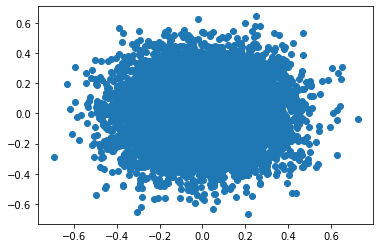

In [84]:
plt.scatter(embedding_matrix[:,0], embedding_matrix[:,1])

In [85]:
review = ['brilliant', 'fantastic', 'amazing', 'good',
          'bad', 'awful','crap', 'terrible', 'trash']
enc_review = []
for word in review:
    enc_review.append(word_index[word])
enc_review

[530, 777, 480, 52, 78, 373, 595, 394, 1157]

In [86]:
review_vectors = embedding_matrix[enc_review]
review_vectors

array([[ 0.12571646,  0.01727046],
       [-0.23336063, -0.13114733],
       [-0.16016819, -0.24657269],
       [ 0.08966786,  0.05310123],
       [ 0.016722  , -0.0007633 ],
       [-0.07494899,  0.20123692],
       [ 0.06066267,  0.09100237],
       [-0.02028809,  0.14206678],
       [-0.25551128, -0.07750598]], dtype=float32)

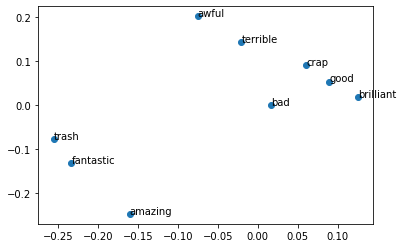

In [87]:
plt.scatter(review_vectors[:,0], review_vectors[:,1])
for i, txt in enumerate(review):
    plt.annotate(txt, (review_vectors[i,0], review_vectors[i,1]))